In [41]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from time import sleep
import matplotlib.pyplot as plt

In [1]:
import numpy as np


In [13]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

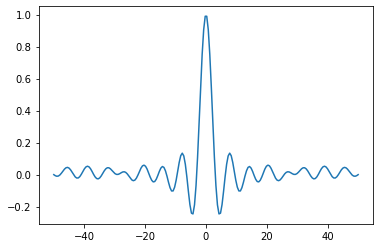

In [58]:
fig, ax = plt.subplots()
ax.plot(t, r_part.T)

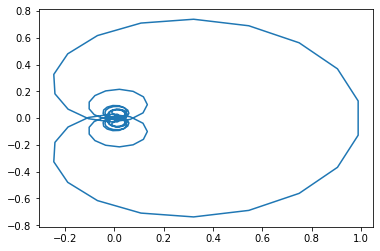

In [59]:
fig, ax = plt.subplots()
ax.plot(r_part.T, i_part.T)

In [164]:
# set configuration
sample_size = 50
nr_sample = 50
num_steps = 50
max_t = 20
t = np.linspace(max_t/num_steps, max_t, num_steps)
sample_config = [sample_size, nr_sample]

# classificatiom
test_size, cv = 0.5, 5
cv_config = [test_size, cv]

### Bounded distributions

In [165]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)

In [166]:
ecf_df = dem.get_ecf(bounded_samples, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.969921,0.882977,0.748636,0.581388,0.398976,0.220256,0.062958,-0.058381,-0.134025,-0.160027,...,0.107692,0.053443,0.004177,-0.033965,-0.056652,-0.061928,-0.050416,-0.025120,0.009103,arcsine
1,0.975052,0.902955,0.791578,0.652882,0.501347,0.352097,0.218983,0.112884,0.040461,0.003530,...,-0.161791,-0.225336,-0.265051,-0.276729,-0.259931,-0.217994,-0.157497,-0.087273,-0.017132,arcsine
2,0.973461,0.896647,0.777629,0.628760,0.465185,0.303028,0.157510,0.041212,-0.037268,-0.074125,...,0.058844,0.008773,-0.030040,-0.053163,-0.058216,-0.045118,-0.016006,0.025161,0.073232,arcsine


In [87]:
x_5_5 = ecf_df.iloc[0,:-1]

In [91]:
x_5_10 = ecf_df.iloc[0,:-1]

In [96]:
x_5_100 = ecf_df.iloc[0,:-1]

Text(0, 0.5, 'Imaginary Part')

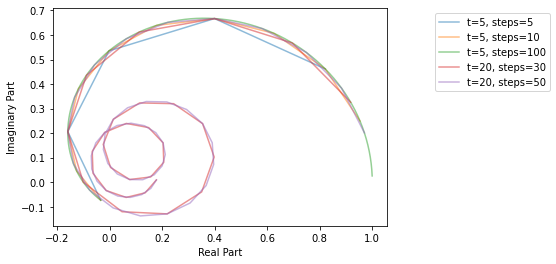

In [169]:
plt.plot(x_5_5[0:5],x_5_5[5:], label = 't=5, steps=5', alpha=0.5)
plt.plot(x_5_10[0:10],x_5_10[10:], label = 't=5, steps=10', alpha=0.5)
plt.plot(x_5_100[0:100],x_5_100[100:], label = 't=5, steps=100', alpha=0.5)
plt.plot(x_20_30[0:30],x_20_30[30:], label = 't=20, steps=30', alpha=0.5)
plt.plot(x_20_50[0:50],x_20_50[50:], label = 't=20, steps=50', alpha=0.5)

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')

Text(0, 0.5, 'Imaginary Part')

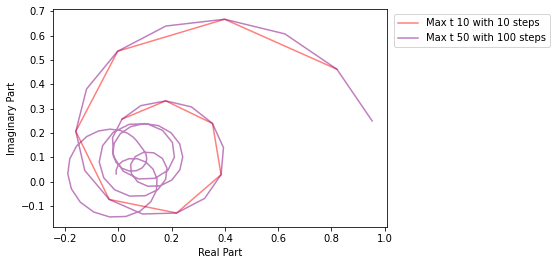

In [147]:
#plt.plot(x_5_5[0:5],x_5_5[5:], label = 'Max t 5 with 5 steps', alpha=0.5)
plt.plot(x_10_10[0:10],x_10_10[10:], label = 'Max t 10 with 10 steps', alpha=0.5, color ='r')
plt.plot(x_50_100[0:100],x_50_100[100:], label = 'Max t 50 with 100 steps', alpha=0.5, color = 'purple')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')

In [167]:
x_20_50 = ecf_df.iloc[0,:-1]

In [141]:
x_50_100 = ecf_df.iloc[0,:-1]

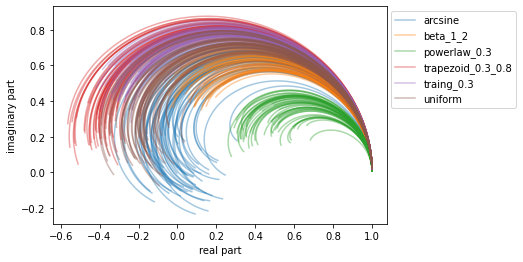

In [97]:
dem.get_ecf_plot(ecf_df,t)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

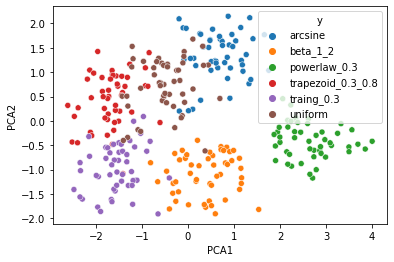

In [18]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

pca = PCA(n_components=5)
x_pca = pca.fit_transform(ecf_df.iloc[:,:-1])

pca_res = pd.DataFrame(x_pca)
pca_res.columns=['PCA1','PCA2','PCA3','PCA4','PCA5']
pca_res['y']=ecf_df['label']

sns.scatterplot(data=pca_res,x='PCA1',y='PCA2',hue='y')

<AxesSubplot:xlabel='PCA4', ylabel='PCA2'>

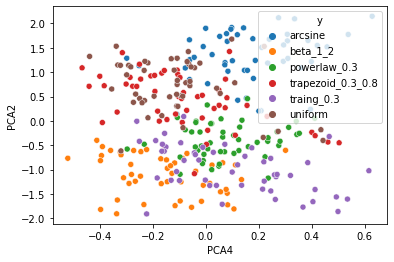

In [26]:
sns.scatterplot(data=pca_res,x='PCA4',y='PCA2',hue='y')

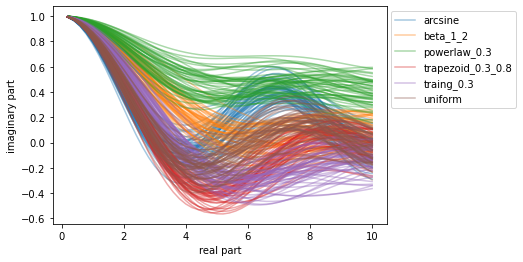

In [16]:
get_ecf_plot2(ecf_df, t)

In [15]:
def get_default_plt_colors():
    return plt.rcParams['axes.prop_cycle'].by_key()['color']

def get_ecf_plot2(df, t):
    names = df.iloc[:,-1].unique()
    fig, ax = plt.subplots()
    colors = get_default_plt_colors()
    handles = []
    for name, color in zip(names, colors):  # iterate over each distribution
        r_part = df.loc[df.iloc[:,-1] == name].iloc[:,0:len(t)]
        hh = ax.plot(t, r_part.T, c=color, alpha=0.4, label=name)
        handles.append(hh[0] if isinstance(hh, list) else hh)
    ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.xlabel('real part')
    plt.ylabel('imaginary part')

### SVM

In [8]:
sample_size_list = [5, 10, 25, 50, 100, 500, 1000]
num_steps_list = np.arange(1,52,2)
max_t_list = [50, 100, 150, 200, 250, 500]

In [9]:
res_svm = cm.cv_ecf(sample_size_list, max_t_list, num_steps_list, bounded_dists, sample_config, cv_config, 1)

  0%|          | 0/7 [00:00<?, ?it/s]

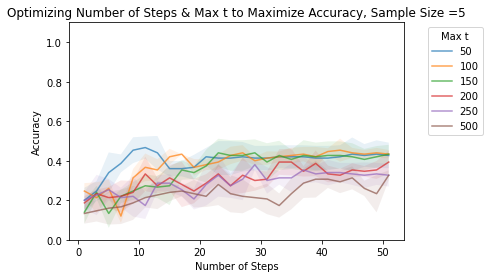

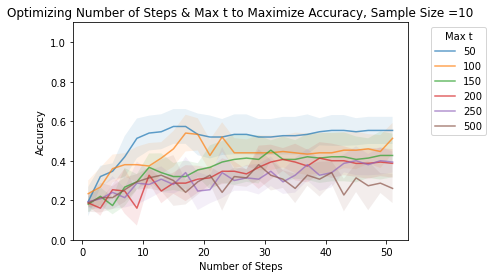

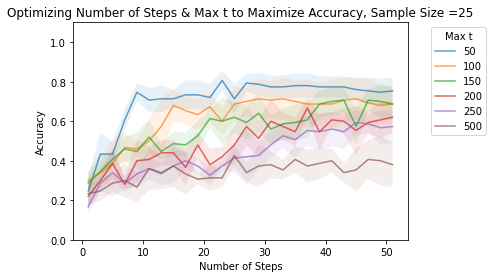

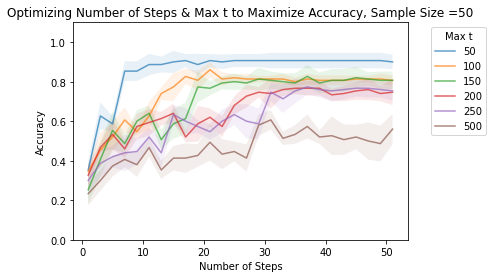

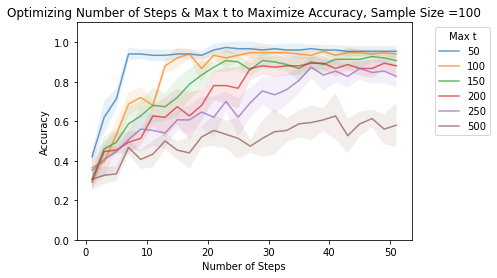

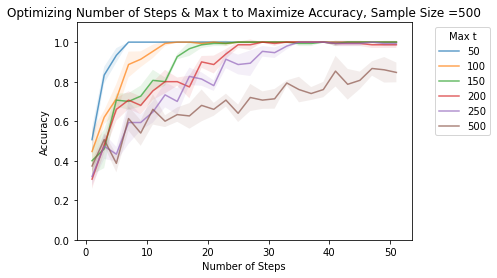

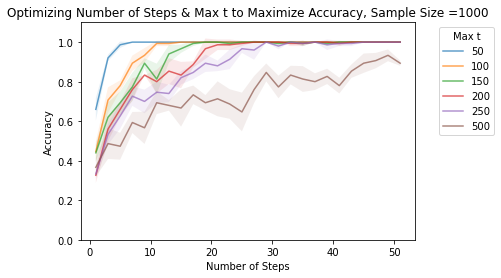

In [14]:
cm.plot_cv_ecf(res_svm)

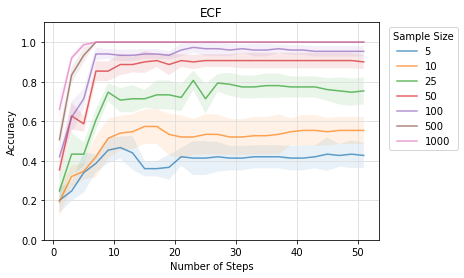

In [33]:
res_svm_50 = res_svm.loc[res_svm['max_t']==50]
plot_ecf(res_svm_50)

In [32]:
import matplotlib.pyplot as plt
def get_default_plt_colors():
    return plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_ecf(result):
    colors = get_default_plt_colors()
    ax = plt.gca()
    for i, color in zip(result['sample_size'].unique(), colors):
        df = result.loc[result['sample_size'] == i]
        plt.plot(df['num_steps'].astype(int), df['acc'].astype(float), label=i, c = color, alpha = 0.7)
        plt.gca().fill_between(df['num_steps'].astype(int), 
                               [i-j for i,j in zip(df['acc'].astype(float), df['std'].astype(float))], 
                               [i+j for i,j in zip(df['acc'].astype(float), df['std'].astype(float))],
                               facecolor=color, alpha=0.1) 
        
        ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Sample Size')
        #plt.title('Optimizing Number of Steps & Sample size to Maximize Accuracy')
        plt.title('ECF')
        plt.xlabel('Number of Steps')
        plt.ylabel('Accuracy')
        plt.grid(color='#DDDDDD')
        plt.ylim(0,1.1)
    plt.show()

### Logistic Regression

In [11]:
res_lr = cm.cv_ecf(sample_size_list, max_t_list, num_steps_list, bounded_dists, sample_config, cv_config, 2)

  0%|          | 0/7 [00:00<?, ?it/s]

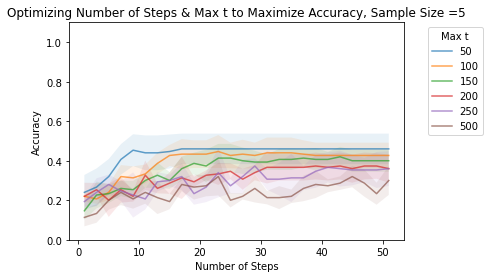

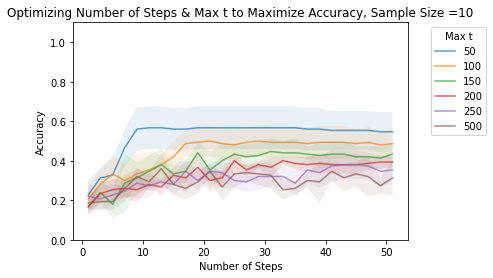

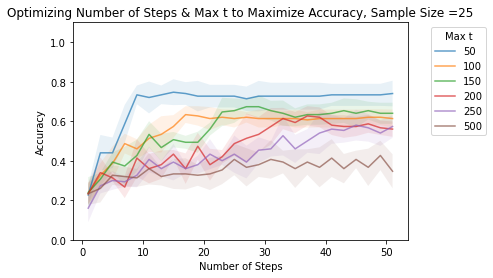

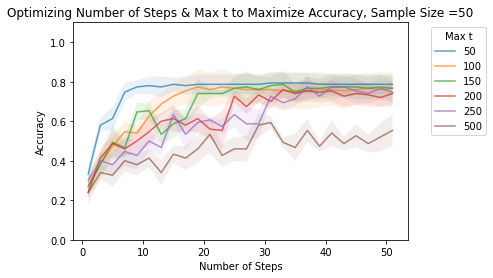

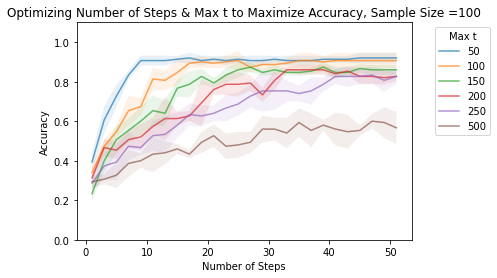

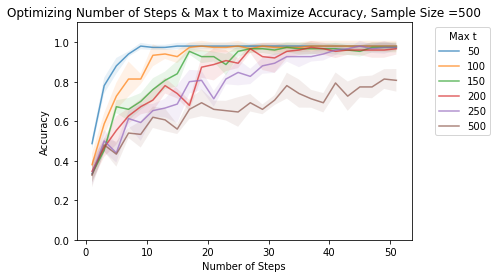

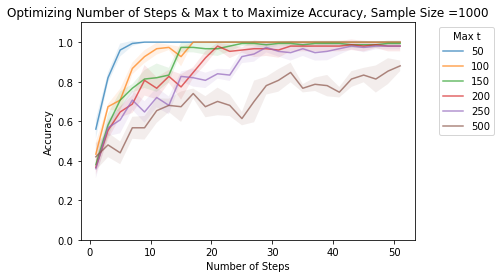

In [12]:
cm.plot_cv_ecf(res_lr)

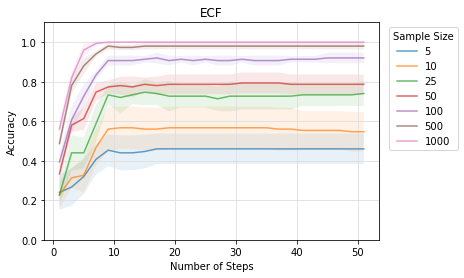

In [34]:
res_lr_50 = res_lr.loc[res_lr['max_t']==50]
plot_ecf(res_lr_50)

### Heavytail distributions

In [35]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size, transform = True)

In [36]:
ecf_df = dem.get_ecf(heavytail_samples, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.979006,0.918403,0.824914,0.708448,0.580447,0.452097,0.332747,0.228853,0.143590,0.077137,...,0.071802,0.075632,0.087668,0.106023,0.127016,0.145890,0.157847,0.159178,0.148183,cauchy
1,0.970527,0.891165,0.784958,0.678650,0.591391,0.527944,0.479412,0.430541,0.369344,0.293911,...,-0.045206,-0.077130,-0.099214,-0.096749,-0.065235,-0.013207,0.041365,0.079501,0.090240,cauchy
2,0.978959,0.919417,0.831014,0.726567,0.618497,0.515895,0.423192,0.340727,0.266685,0.199370,...,0.187993,0.185963,0.188383,0.196047,0.206573,0.215470,0.218315,0.213069,0.201399,cauchy


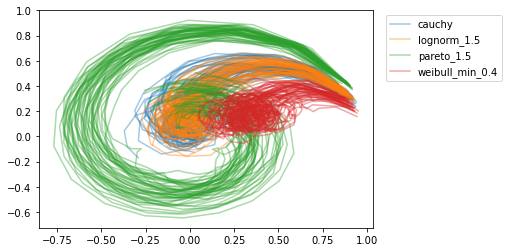

In [38]:
dem.get_ecf_plot(ecf_df, t)

### SVM

In [37]:
res_svm_ht = cm.cv_ecf(sample_size_list, max_t_list, num_steps_list, heavytail_dists, sample_config, cv_config, 1, transform = True)

  0%|          | 0/7 [00:00<?, ?it/s]

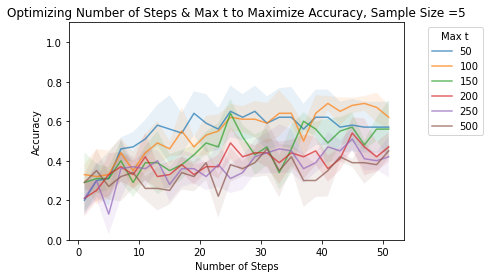

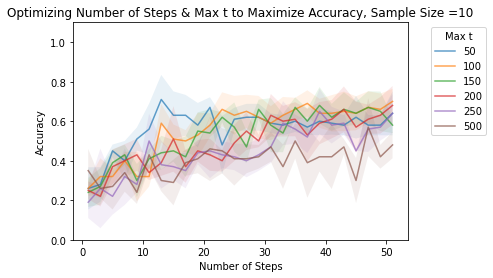

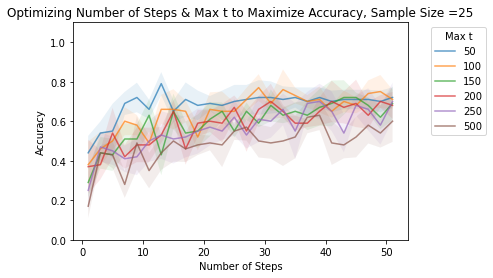

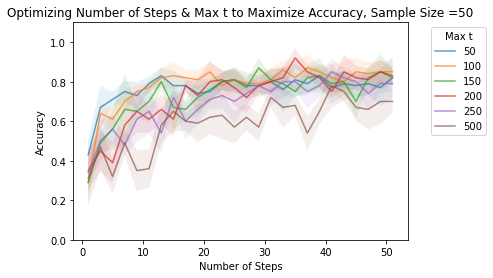

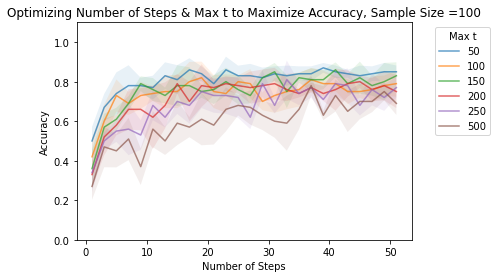

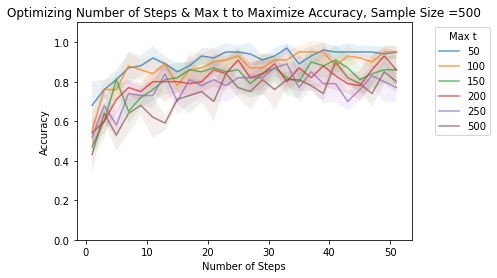

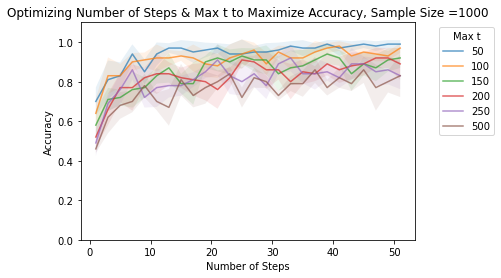

In [91]:
cm.plot_cv_ecf(res_svm_ht)

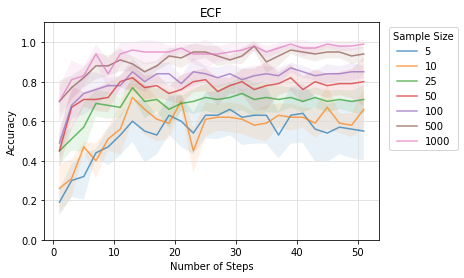

In [39]:
res_svm_ht_50 = res_svm_ht.loc[res_svm_ht['max_t']==50]
plot_ecf(res_svm_ht_50)

### Logistic Regression

In [38]:
res_lr_ht = cm.cv_ecf(sample_size_list, max_t_list, num_steps_list, heavytail_dists, sample_config, cv_config, 2, transform=True)

  0%|          | 0/7 [00:00<?, ?it/s]

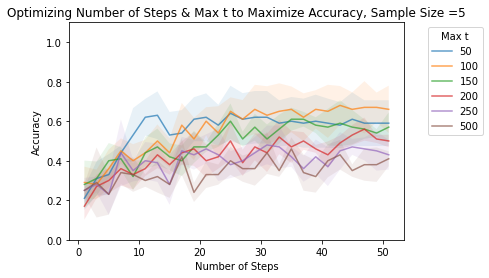

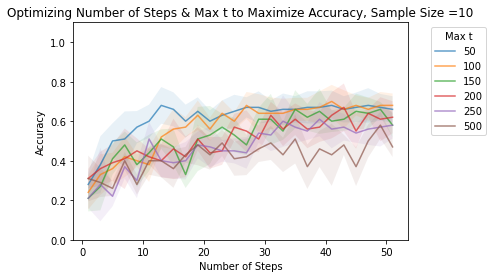

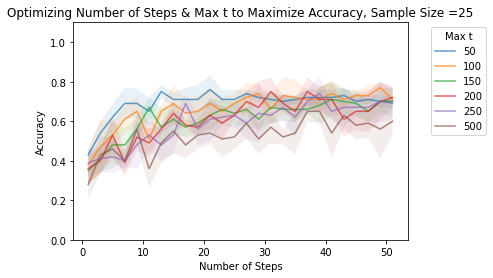

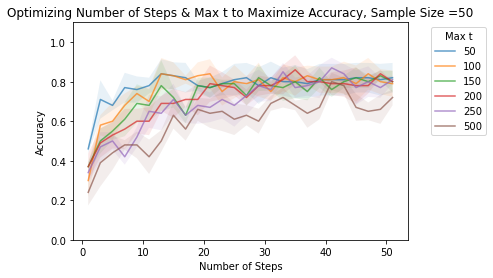

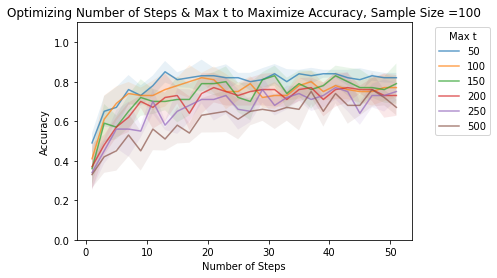

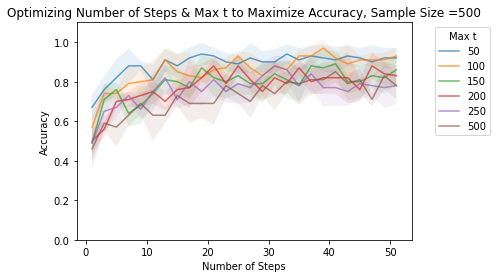

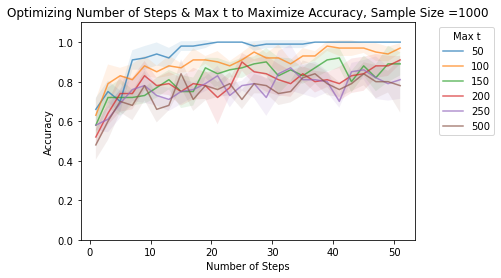

In [92]:
cm.plot_cv_ecf(res_lr_ht)

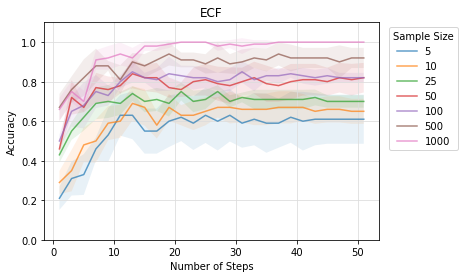

In [40]:
res_lr_ht_50 = res_lr_ht.loc[res_lr_ht['max_t']==50]
plot_ecf(res_lr_ht_50)